In [91]:
from keras.datasets import cifar10

In [92]:
# CIFAR DATASET CONTAINS 60000 IMAGES OF 10 DIFFERENT CATEGORIES

# 0 - AEROPLANE
# 1 - AUTOMOBILE
# 2 - BIRD
# 3 - CAT
# 4 - DEER
# 5 - DOG
# 6 - FROG
# 7 - HORSE
# 8 - SHIP
# 9 - TRUCK

# ALL THESE IMAGES WILL HAVE SIZE 32 * 32

# 50,000 IMAGES ARE FOR TRAINING DATA
# 10,000 IMAGES ARE FOR TESTING DATA

In [93]:
(X_train,Y_train) , (X_test,Y_test) = cifar10.load_data()

In [94]:
# TRAINING SAMPLES OF 50,000 IMAGES WITH 32 * 32 IMAGE SIZE WITH 3 DIMENSIONAL DATA
print("X_train Shape:",X_train.shape)

# TEST SAMPLES OF 50,000 IMAGES WITH 32 * 32 IMAGE SIZE WITH 3 DIMENSIONAL DATA
print("X_test Shape:",X_test.shape)

# AS IT IS ALREADY LABEL ENCODED --> (0 MEANS AEROPLANE, 1 MEANS AUTOMOBILE, ... 9 MEANS TRUCK)
print("Y_train Shape:",Y_train.shape)

print("Y_test Shape:",Y_test.shape)

X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
Y_train Shape: (50000, 1)
Y_test Shape: (10000, 1)


In [95]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [96]:
import pandas as pd
pd.DataFrame(Y_train).value_counts()

,count
0,
0,5000
1,5000
2,5000
3,5000
4,5000
5,5000
6,5000
7,5000
8,5000


array([[[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 251, 251],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [250, 250, 250]],

       [[251, 251, 251],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [251, 251, 251],
        [252, 252, 252],
        [251, 251, 251]],

       ...,

       [[149, 149, 149],
        [ 62,  62,  62],
        [ 65,  65,  65],
        ...,
        [207, 200, 190],
        [202, 192, 182],
        [214, 207, 200]],

       [[159, 159, 159],
        [ 71,  71,  71],
        [ 72,  72,  72],
        ...,
        [199, 180, 158],
        [202, 191, 180],
        [212, 207, 203]],

       [[224, 224, 224],
        [194, 194, 194],
        [182, 182, 182],
        ...,
        [214, 201, 185],
        [215, 208, 200],
        [217, 215, 213]]], dtype=uint8)
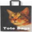

In [97]:
X_train[3000]

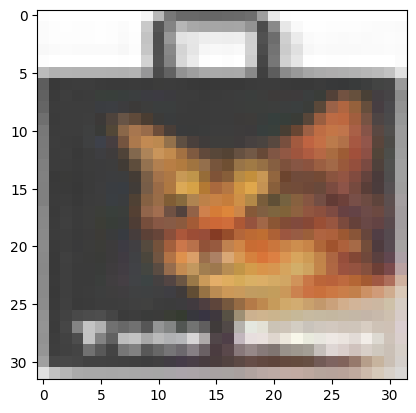

In [98]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3000])

In [99]:
# EVERY CELL UNDER THE IMAGE CONTAINS 0-255 AS THE RANGE

"""
      SCALE 0-1 ---> Max_Value(255)
25    0.09804
12    0.04706
250   0.98039
255   1
0     0
"""

# Doing some kind of Standardization/ Min-Max Scaler

X_train1 = X_train/255
X_test1 = X_test/255

In [100]:
X_train1

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [101]:
# DOING ONEHOTENCODING

from keras.utils import to_categorical
Y_cat_train = to_categorical(Y_train,10)
Y_cat_test = to_categorical(Y_test,10)

In [102]:
print(Y_cat_train.shape)
print(Y_cat_test.shape)

(50000, 10)
(10000, 10)


In [103]:
Y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [104]:
# MODEL BUILDING

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [105]:
model = Sequential()

# STEP 1 ---> ADDING CONVOLUTIONAL LAYER
# KERNAL_SIZE IS NOTHING BUT THE SIZE OF FEATURE DETECTOR(randomly, but mostly 50% but here 50% is huge(32/2 = 16) so we are taking small)
# WE NEED TO APPLY ACTIVATION FUNCTION ON FEATURE MAP(IT INTRODUCES NON-LINEARITY)
model.add(Conv2D(input_shape=(32,32,3), kernel_size=(4,4), filters=32, activation='relu'))

# STEP 2 ---> MAX POOLING LAYER
# WE CAN SELECT THE SIZE RANDOMLY
model.add(MaxPool2D(pool_size=(2,2)))

# STEP 3 ---> FLATTENING
model.add(Flatten())

# INPUT LAYER PART
# Pool size = (2,2) with 32 filters ---> 32 Max Pooling layers
# 32 * 2 * 2 = 128 columns will be generated for one image
model.add(Dense(units=128, activation='relu'))

# WE CAN ADD/IGNORE HIDDEN LAYER

# OUTPUT LAYER ---> 10 CLASSES AS OUTPUT
model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
# MODEL COMPILATION

# HERE OUTPUT IS MULTICLASS AND WE APPLIED ONEHOTENCODING ---> SO, LOSS FUNCTION IS CATEGORICAL_CROSSENTROPY
# RMSprop (Root Mean Square Propagation) is an optimization algorithm commonly used in training neural networks. It's designed to address
# the challenges of vanishing and exploding gradients, which can hinder the training process.
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [107]:
 model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 805,802 (3.07 MB)

 Trainable params: 805,802 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [108]:
# MODEL FITTING
model.fit(X_train1,Y_cat_train,verbose=1,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 31ms/step - accuracy: 0.3712 - loss: 1.7487
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 28ms/step - accuracy: 0.5652 - loss: 1.2442
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6191 - loss: 1.0920
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - accuracy: 0.6696 - loss: 0.9602
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.6980 - loss: 0.8794


In [110]:
# EVALUATING THE MODEL
model.evaluate(X_test1,Y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6332 - loss: 1.0862


[1.091138482093811, 0.6349999904632568]

In [111]:
Y_Pred_test = model.predict(X_test)
Y_Pred_test

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99999994, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.99999994, 0.        ,
        0.        ]], dtype=float32)

In [112]:
# Predicting by taking a image
import numpy as np
sample = X_train[4]
print("sample.shape",sample.shape)
sample = sample.reshape(1,32,32,3)

print("sample.shape: ",sample.shape)

sample.shape (32, 32, 3)
sample.shape:  (1, 32, 32, 3)


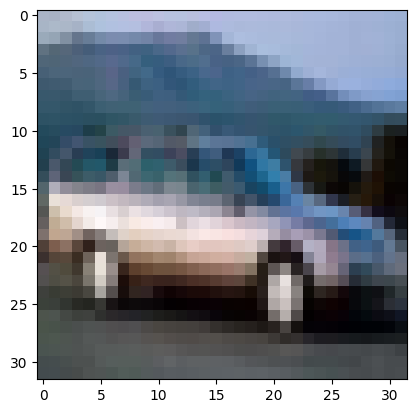

In [113]:
plt.imshow(X_train[4])

In [114]:
predicted_class = model.predict(sample)
predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)